# Importing the libraries

In [26]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



# Loading the dataset

In [89]:
raw_data = pd.read_csv('House-Price-Datasets.csv').drop('Unnamed: 0', axis = 1)
raw_data.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


# Data Preprocessing

In [90]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [91]:
data1 = raw_data.copy()
# We can consider that the houses which have 'NaN' in 'society' are not affiliated in any society. Obviously it cannot be 
# said without field investigation. Just for learning purpose let's assume those are single houses.
data1['society'] = data1['society'].fillna('Single Housing')
# 'NaN' value in 'balcony' is zero as these houses have no balcony.
data1['balcony'] = data1['balcony'].fillna(0)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [92]:
data1.isnull().sum()
# Missing value in 'location', 'size', 'bath' cannot be filled. So, we will drop them...

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [93]:
data2 = data1.dropna(axis=0)
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [94]:
data2['bath'] = data2['bath'].astype(int)
data2['balcony'] = data2['balcony'].astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   size          13246 non-null  object 
 4   society       13246 non-null  object 
 5   total_sqft    13246 non-null  object 
 6   bath          13246 non-null  int32  
 7   balcony       13246 non-null  int32  
 8   price         13246 non-null  float64
dtypes: float64(1), int32(2), object(6)
memory usage: 931.4+ KB


C:\Users\Tonmoy\AppData\Local\Temp\ipykernel_10372\3730671912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['bath'] = data2['bath'].astype(int)
C:\Users\Tonmoy\AppData\Local\Temp\ipykernel_10372\3730671912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['balcony'] = data2['balcony'].astype(int)


In [95]:
## data['total_sqft'] = data['total_sqft'].astype(float) will not work
## As we can see we cannot convert 'total_sqft' data from object to float because there are some range value in it.
## Either we have to delete those range values or replace the range values with their means.
## Let's define a fucntion to know how many values can be converted into float
def is_it_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [96]:
# Let's see the only range values
data2[~data2.total_sqft.apply(is_it_float)].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4,0,186.000
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4,0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2,0,54.005
165,Super built-up Area,18-Dec,Sarjapur,2 BHK,Kinuerg,1145 - 1340,2,0,43.490
188,Super built-up Area,Ready To Move,KR Puram,2 BHK,MCvarar,1015 - 1540,2,0,56.800


In [97]:
# Counting the range values
data2[~data2.total_sqft.apply(is_it_float)].count()

area_type       190
availability    190
location        190
size            190
society         190
total_sqft      190
bath            190
balcony         190
price           190
dtype: int64

In [98]:
# Creating a fucntion for converting the range values into their means and also converting them into float
def convert_sqft_to_num(x):
    if_split = x.split('-')
    if len(if_split) == 2:
        return np.average([float(if_split[0]), float(if_split[1])])
    try:
        return float(x)
    except:
        return None

In [99]:
# testing the function for range value
convert_sqft_to_num('2000 - 3000')

2500.0

In [100]:
# testing the function for normal value
convert_sqft_to_num('3000')

3000.0

In [101]:
# Now we will convert the 'total_sqft' column from object to function using the convert function -we just ceated
data3= data2.copy()
data3['total_sqft'] = data2['total_sqft'].apply(convert_sqft_to_num)
data3.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13246,13246,13246,13246,13246,13200.000000,13246.000000,13246.000000,13246.000000
unique,4,80,1304,31,2668,NaN,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,Single Housing,NaN,NaN,NaN,NaN
freq,8740,10564,534,5198,5499,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1555.302783,2.692586,1.520233,112.389392
std,NaN,NaN,NaN,NaN,NaN,1237.323445,1.341506,0.859301,149.076587
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,1100.000000,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,1275.000000,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,1672.000000,3.000000,2.000000,120.000000


In [102]:
data3['area_type'].value_counts()

area_type
Super built-up  Area    8740
Built-up  Area          2410
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

<Axes: xlabel='area_type', ylabel='price'>

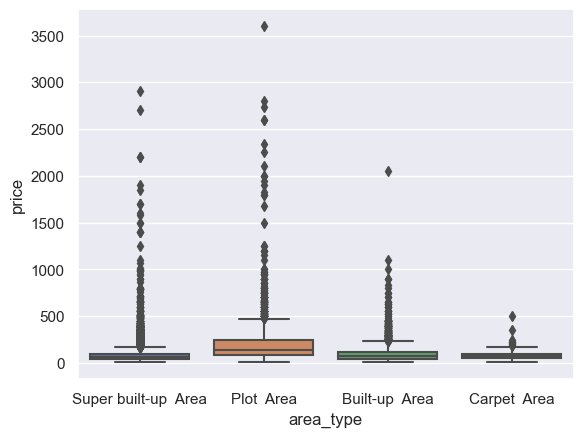

In [103]:
sns.boxplot(data=data3, x='area_type', y='price')

In [104]:
data3['availability'].value_counts()

availability
Ready To Move    10564
18-Dec             297
18-May             291
18-Apr             269
18-Aug             200
                 ...  
15-Dec               1
20-Feb               1
16-Jul               1
14-Nov               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [105]:
data3['location'].value_counts()

location
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: count, Length: 1304, dtype: int64

In [106]:
data3['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [107]:
selected_row = data3[data3['size'] == '18 Bedroom']
selected_row


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11559,Plot Area,18-Apr,1Kasavanhalli,18 Bedroom,HMwerCo,1200.0,18,0,200.0


In [108]:
selected_rows = data3.loc[data3['size'].isin(['9 BHK',
'8 BHK',            
'11 BHK',           
'11 Bedroom',       
'10 BHK',           
'14 BHK',           
'13 BHK',           
'12 Bedroom',       
'27 BHK',           
'43 Bedroom',       
'16 BHK',          
'19 BHK',    
'18 Bedroom'])]
selected_rows

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
459,Super built-up Area,Ready To Move,1 Giri Nagar,11 BHK,Bancyri,5000.0,9,3,360.0
538,Super built-up Area,Ready To Move,Mico Layout,9 BHK,Amsomun,5000.0,9,3,210.0
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,Single Housing,NaN,9,1,296.0
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,Single Housing,8000.0,27,0,230.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,Single Housing,1200.0,11,0,170.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10 BHK,Single Housing,12000.0,12,0,525.0
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19 BHK,Single Housing,2000.0,16,0,490.0
3609,Super built-up Area,Ready To Move,Koramangala Industrial Layout,16 BHK,Single Housing,10000.0,16,0,550.0
3853,Plot Area,Ready To Move,1 Annasandrapalya,11 Bedroom,Single Housing,1200.0,6,3,150.0
4585,Carpet Area,Ready To Move,4th Block Koramangala,9 BHK,Single Housing,4500.0,9,0,500.0


In [109]:
# creating new column for the size
data3['bhk'] = data3['size'].apply(lambda x : int(x.split(' ')[0]))
data3.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
count,13246,13246,13246,13246,13246,13200.000000,13246.000000,13246.000000,13246.000000,13246.000000
unique,4,80,1304,31,2668,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,Single Housing,NaN,NaN,NaN,NaN,NaN
freq,8740,10564,534,5198,5499,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1555.302783,2.692586,1.520233,112.389392,2.801902
std,NaN,NaN,NaN,NaN,NaN,1237.323445,1.341506,0.859301,149.076587,1.295758
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,8.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,1672.000000,3.000000,2.000000,120.000000,3.000000


In [110]:
data3['society'].value_counts()

society
Single Housing    5499
GrrvaGr             80
PrarePa             71
Sryalan             59
Prtates             58
                  ... 
K tlete              1
Amionce              1
JaghtDe              1
Jauraht              1
RSntsAp              1
Name: count, Length: 2668, dtype: int64

# Determining the variables of interest

In [111]:
# Let's check the column names
data3.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk'],
      dtype='object')

In [155]:
# Removing the redundent columns from dataset
data4 = data3.drop(['availability','size'], axis=1)
data4.describe(include='all')

,area_type,location,society,total_sqft,bath,balcony,price,bhk
count,13246,13246,13246,13200.00,13246.00,13246.00,13246.00,13246.00
unique,4,1304,2668,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Whitefield,Single Housing,NaN,NaN,NaN,NaN,NaN
freq,8740,534,5499,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1555.30,2.69,1.52,112.39,2.80
std,NaN,NaN,NaN,1237.32,1.34,0.86,149.08,1.30
min,NaN,NaN,NaN,1.00,1.00,0.00,8.00,1.00
25%,NaN,NaN,NaN,1100.00,2.00,1.00,50.00,2.00
50%,NaN,NaN,NaN,1275.00,2.00,2.00,72.00,3.00
75%,NaN,NaN,NaN,1672.00,3.00,2.00,120.00,3.00


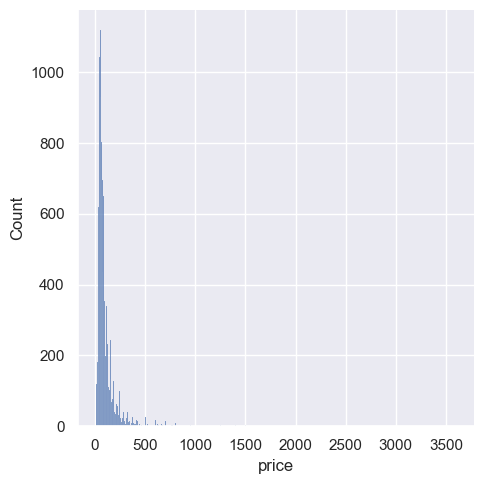

In [156]:
sns.displot(data=data4, x='price')

In [157]:
# We can see there are some outliers present. 'price' is skewed to the right
p = data4['price'].quantile(0.98)
data5 = data4[data4['price']<p]
data5.describe(include='all')

,area_type,location,society,total_sqft,bath,balcony,price,bhk
count,12981,12981,12981,12936.00,12981.00,12981.00,12981.00,12981.00
unique,4,1284,2635,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Whitefield,Single Housing,NaN,NaN,NaN,NaN,NaN
freq,8653,513,5342,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1490.31,2.65,1.52,97.26,2.77
std,NaN,NaN,NaN,1066.95,1.26,0.85,77.37,1.22
min,NaN,NaN,NaN,1.00,1.00,0.00,8.00,1.00
25%,NaN,NaN,NaN,1100.00,2.00,1.00,49.85,2.00
50%,NaN,NaN,NaN,1260.00,2.00,2.00,70.00,3.00
75%,NaN,NaN,NaN,1641.25,3.00,2.00,115.00,3.00


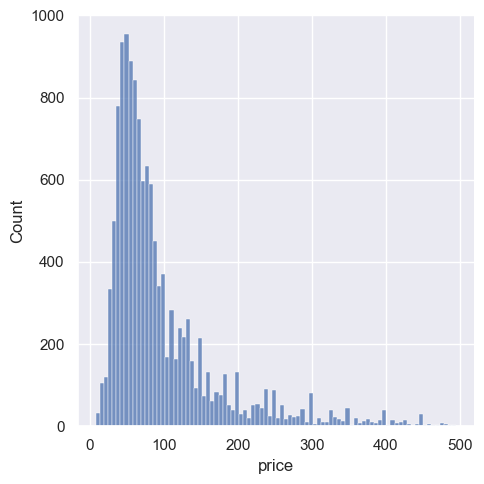

In [158]:
sns.displot(data=data5, x='price')
# Now there are some fewer outliers

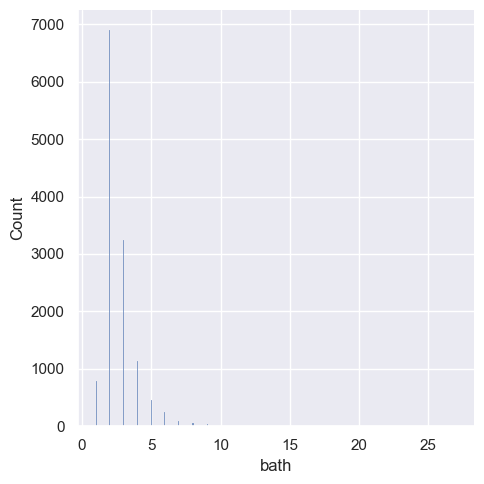

In [159]:
sns.displot(data5['bath'])

In [160]:
b = data5['bath'].quantile(0.99)
data6 = data5[data5['bath']<b]
data6.describe(include='all')

,area_type,location,society,total_sqft,bath,balcony,price,bhk
count,12762,12762,12762,12719.00,12762.00,12762.00,12762.00,12762.00
unique,4,1260,2632,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Whitefield,Single Housing,NaN,NaN,NaN,NaN,NaN
freq,8625,513,5136,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1475.25,2.55,1.53,95.58,2.68
std,NaN,NaN,NaN,989.38,1.00,0.84,75.94,0.99
min,NaN,NaN,NaN,1.00,1.00,0.00,8.00,1.00
25%,NaN,NaN,NaN,1100.00,2.00,1.00,49.00,2.00
50%,NaN,NaN,NaN,1260.00,2.00,2.00,70.00,3.00
75%,NaN,NaN,NaN,1635.00,3.00,2.00,110.00,3.00


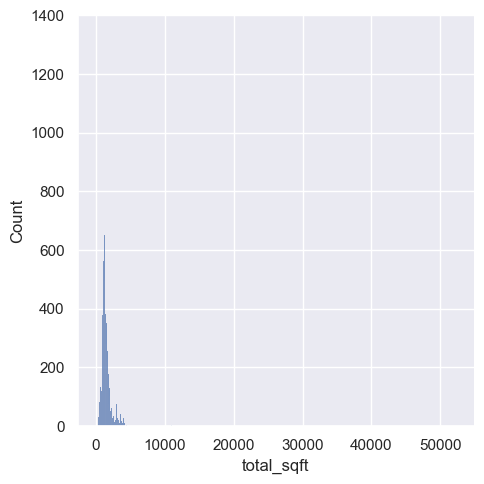

In [161]:
sns.displot(data6['total_sqft'])

In [168]:
sq= data6['total_sqft'].quantile(0.99)
data7 =data6[data6['total_sqft']<sq]
data7.describe(include='all')

,area_type,location,society,total_sqft,bath,balcony,price,bhk
count,12591,12591,12591,12591.00,12591.00,12591.00,12591.00,12591.00
unique,4,1244,2614,NaN,NaN,NaN,NaN,NaN
top,Super built-up Area,Whitefield,Single Housing,NaN,NaN,NaN,NaN,NaN
freq,8575,500,5038,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1426.13,2.54,1.53,93.31,2.66
std,NaN,NaN,NaN,599.80,0.98,0.84,72.36,0.98
min,NaN,NaN,NaN,1.00,1.00,0.00,8.00,1.00
25%,NaN,NaN,NaN,1100.00,2.00,1.00,49.00,2.00
50%,NaN,NaN,NaN,1255.00,2.00,2.00,69.18,3.00
75%,NaN,NaN,NaN,1612.50,3.00,2.00,110.00,3.00


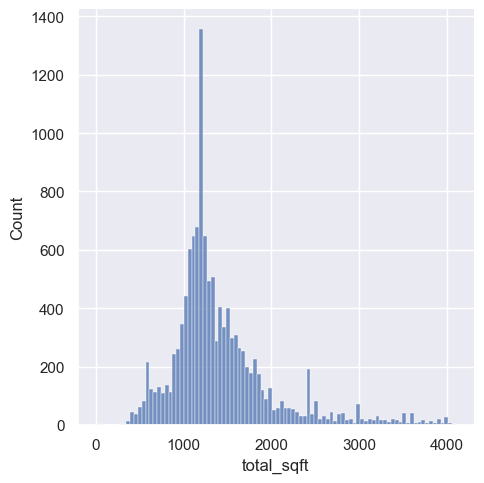

In [169]:
sns.displot(data7['total_sqft'])

Text(0.5, 1.0, 'Price and BHK')

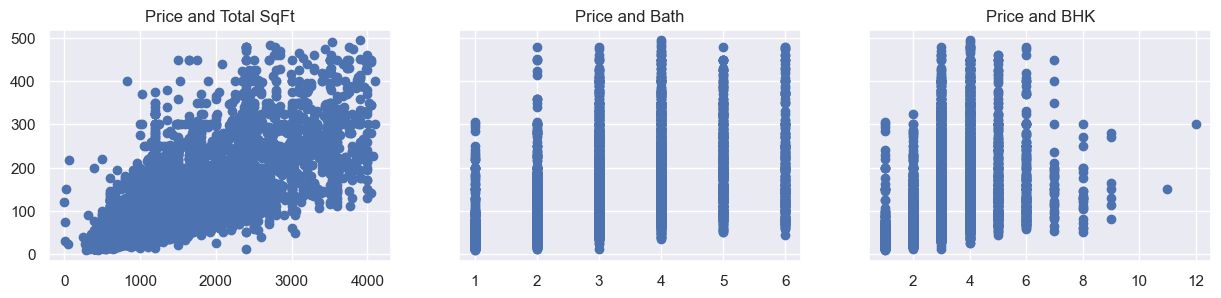

In [170]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data7['total_sqft'],data7['price'])
ax1.set_title('Price and Total SqFt')
ax2.scatter(data7['bath'],data7['price'])
ax2.set_title('Price and Bath')
ax3.scatter(data7['bhk'],data7['price'])
ax3.set_title('Price and BHK')

In [171]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data7['price'])

# Then we add it to our data frame
data7['log_price'] = log_price
data7

,area_type,location,society,total_sqft,bath,balcony,price,bhk,log_price
0,Super built-up Area,Electronic City Phase II,Coomee,1056.00,2,1,39.07,2,3.67
1,Plot Area,Chikka Tirupathi,Theanmp,2600.00,5,3,120.00,4,4.79
2,Built-up Area,Uttarahalli,Single Housing,1440.00,2,3,62.00,3,4.13
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521.00,3,1,95.00,3,4.55
4,Super built-up Area,Kothanur,Single Housing,1200.00,2,1,51.00,2,3.93
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,SoosePr,1715.00,3,3,112.00,3,4.72
13315,Built-up Area,Whitefield,ArsiaEx,3453.00,4,0,231.00,5,5.44
13316,Super built-up Area,Richards Town,Single Housing,3600.00,5,0,400.00,4,5.99
13317,Built-up Area,Raja Rajeshwari Nagar,Mahla T,1141.00,2,1,60.00,2,4.09


Text(0.5, 1.0, 'Log Price and BHK')

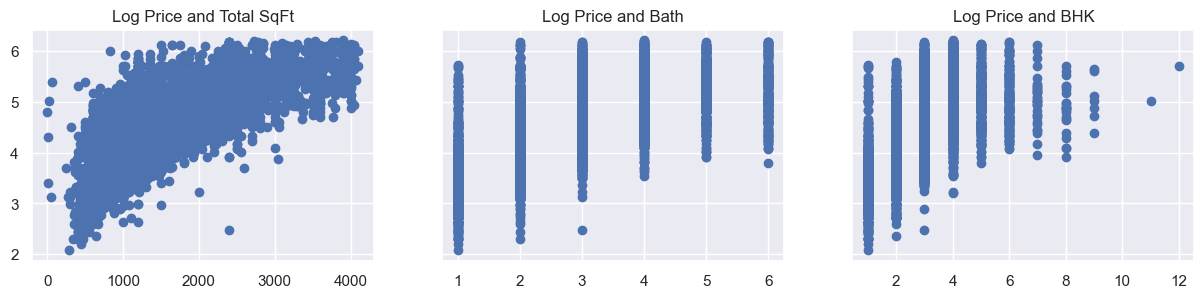

In [269]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data7['total_sqft'],data7['log_price'])
ax1.set_title('Log Price and Total SqFt')
ax2.scatter(data7['bath'],data7['log_price'])
ax2.set_title('Log Price and Bath')
ax3.scatter(data7['bhk'],data7['log_price'])
ax3.set_title('Log Price and BHK')

# log transformation moderately mitigate the heteroskedasticity issue.

In [166]:
# Let's change the price into per square price
# data7['price_per_sqft'] = data7['price']*100000/data7['total_sqft']
# data7.drop('log_price',axis=1)

In [173]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12591 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12591 non-null  object 
 1   location    12591 non-null  object 
 2   society     12591 non-null  object 
 3   total_sqft  12591 non-null  float64
 4   bath        12591 non-null  int32  
 5   balcony     12591 non-null  int32  
 6   price       12591 non-null  float64
 7   bhk         12591 non-null  int64  
 8   log_price   12591 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(3)
memory usage: 885.3+ KB


In [174]:
# ps = data7['price_per_sqft'].quantile(0.99)
# data8 = data7[data7['price_per_sqft']<ps]
# data8.describe()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data8['total_sqft'],data8['price_per_sqft'])
ax1.set_title('Price per SqFt and Total SqFt')
ax2.scatter(data8['bath'],data8['price_per_sqft'])
ax2.set_title('Price per SqFt and Bath')
ax3.scatter(data8['bhk'],data8['price_per_sqft'])
ax3.set_title('Price per SqFt and BHK')

log_price_ps = np.log(data8['price'])
data8_1 = data8.copy()

#### Then we add it to our data frame
data8_1['log_price_ps'] = log_price_ps
data8_1

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data8_1['total_sqft'],data8_1['log_price_ps'])
ax1.set_title('Log Price per SqFt and Total SqFt')
ax2.scatter(data8_1['balcony'],data8_1['log_price_ps'])
ax2.set_title('Lpg Price per SqFt and Bath')
ax3.scatter(data8_1['bhk'],data8_1['log_price_ps'])
ax3.set_title('Lpg Price per SqFt and BHK')

data9 = pd.get_dummies(data8_1, drop_first=True, dtype=int)
data9.head()

In [176]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

obj_col = data7.select_dtypes(include='object').columns

for col in obj_col:
    data7[col] = data7[col].str.lower()
    
for col in obj_col:
    data7[col] = le.fit_transform(data7[col])
data7

,area_type,location,society,total_sqft,bath,balcony,price,bhk,log_price
0,3,399,444,1056.00,2,1,39.07,2,3.67
1,2,295,2366,2600.00,5,3,120.00,4,4.79
2,0,1143,1970,1440.00,2,3,62.00,3,4.13
3,3,730,2083,1521.00,3,1,95.00,3,4.55
4,3,684,1970,1200.00,2,1,51.00,2,3.93
...,...,...,...,...,...,...,...,...,...
13314,3,455,2123,1715.00,3,3,112.00,3,4.72
13315,0,1216,197,3453.00,4,0,231.00,5,5.44
13316,3,961,1970,3600.00,5,0,400.00,4,5.99
13317,0,928,1129,1141.00,2,1,60.00,2,4.09


In [179]:


inputs1 = data7.drop(['price','log_price'], axis = 1)
targets1 = data7['price']

x1_train, x1_test, y1_train, y1_test = train_test_split(inputs1, targets1, test_size=0.2, random_state=365)

reg1 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg1.fit(x1_train, x1_test, y1_train, y1_test)
print(models)


 79%|███████▊  | 33/42 [00:33<00:06,  1.37it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:45<00:00,  1.07s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 10072, number of used features: 7
[LightGBM] [Info] Start training from score 93.005968
                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
LGBMRegressor                                0.76       0.76    36.64   
XGBRegressor                                 0.76       0.76    36.84   
HistGradientBoostingRegressor                0.75       0.75    37.16   
RandomForestRegressor                        0.74       0.74    38.40   
GradientBoostingRegressor                    0.72       0.72    39.81   
ExtraTreesRegressor                          0.71       0.72    39.90   
BaggingRegr

In [180]:
targets2 = data7['log_price']
x2_train, x2_test, y2_train, y2_test = train_test_split(inputs1, targets2, test_size=0.2, random_state=365)

reg2 = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models2, predictions2 = reg1.fit(x2_train, x2_test, y2_train, y2_test)
print(models2)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 79%|███████▊  | 33/42 [00:32<00:06,  1.31it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:42<00:00,  1.02s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 10072, number of used features: 7
[LightGBM] [Info] Start training from score 4.317677
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 0.80       0.80   0.28   
LGBMRegressor                                0.80       0.80   0.28   
HistGradientBoostingRegressor                0.79       0.79   0.29   
RandomForestRegressor                        0.78       0.78   0.29   
BaggingRegressor                             0.76       0.76   0.31   
GradientBoostingRegressor                    0.76       0.76   0.31   
ExtraTreesRegressor                          0.75       0.75   0.31   
SVR                  

# Regression

In [182]:
# XGBoost Regression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import mean_squared_error as mse

### Regression using natural logarithm of prices as targets

In [223]:
xgbr = XGBRegressor(verbosity =0,
                    learning_rate= 0.3,
                   random_state = 42)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [224]:
xgbr.fit(x2_train, y2_train)
score = xgbr.score(x2_train, y2_train)
print("Training Score (R-squared): ", score.round(4))

Training Score (R-squared):  0.9087


In [225]:
cv_score = cvs(xgbr, x2_train, y2_train, cv=10)
print("Cross Validation Score: ", cv_score.mean().round(4))

Cross Validation Score:  0.794


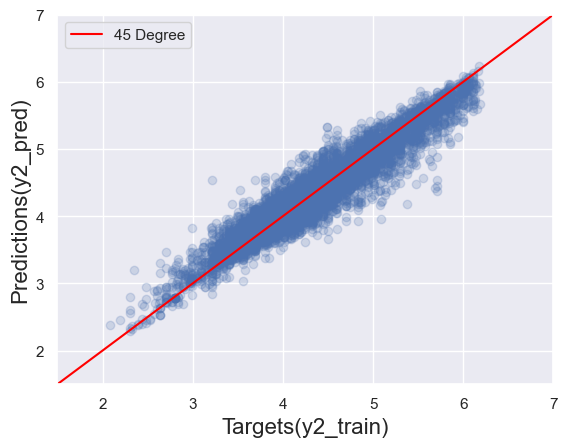

In [230]:
y2_pred = xgbr.predict(x2_train)

plt.axline((0, 0), slope=1, color='red', label='45 Degree')
plt.scatter(y2_train, y2_pred,alpha=0.2)
plt.xlabel('Targets(y2_train)', size = 16)
plt.ylabel('Predictions(y2_pred)', size = 16)
plt.xlim(1.5,7)
plt.ylim(1.5,7)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

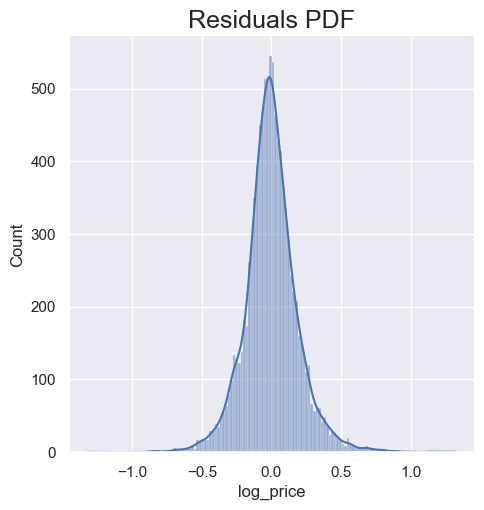

In [231]:
sns.displot(y2_train - y2_pred, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

## Testing the log_price model 

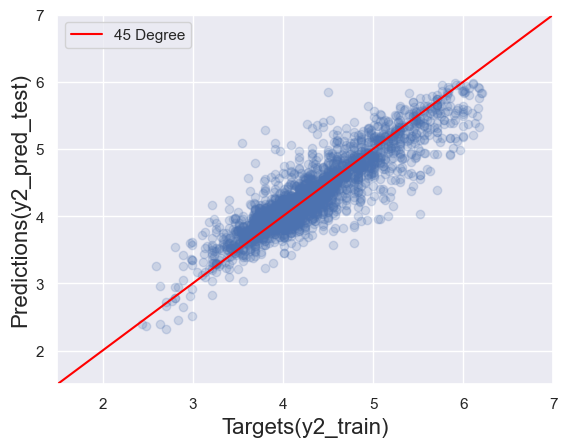

In [267]:
# testing
y2_pred_test = xgbr.predict(x2_test)

plt.axline((0, 0), slope=1, color='red', label='45 Degree')
plt.scatter(y2_test, y2_pred_test,alpha=0.2)
plt.xlabel('Targets(y2_train)', size = 16)
plt.ylabel('Predictions(y2_pred_test)', size = 16)
plt.xlim(1.5,7)
plt.ylim(1.5,7)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

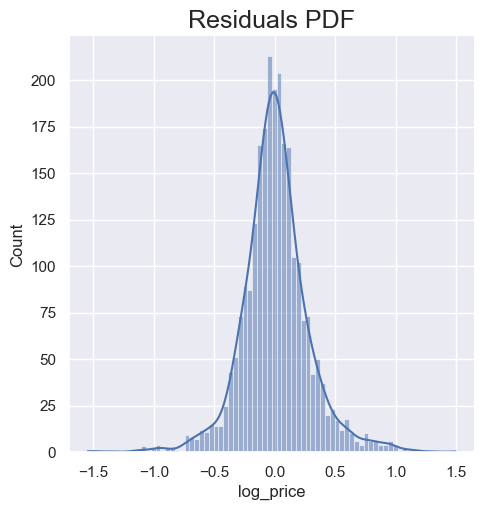

In [268]:
# Creating residuals plot
# In best case scenario plot should be bell curved
sns.displot(y2_test - y2_pred_test, kde=True)

# Include a title
plt.title("Residuals PDF", size=18)

In [275]:
# Let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y2_pred_test), columns=['Predictions'])

# To get a proper result, we must reset the index and drop the old indexing
y2_test = y2_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y2_test)
df_pf

,Predictions,Target
0,60.48,30.00
1,65.18,75.00
2,50.88,53.00
3,68.56,55.00
4,74.55,60.00
...,...,...
2514,12.41,20.00
2515,85.76,75.00
2516,80.42,61.80
2517,74.60,56.00


In [276]:
# calculating the difference between the targets and the predictions
# this is actually the residual 
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,60.48,30.00,-30.48,101.61
1,65.18,75.00,9.82,13.09
2,50.88,53.00,2.12,4.01
3,68.56,55.00,-13.56,24.65
4,74.55,60.00,-14.55,24.25
...,...,...,...,...
2514,12.41,20.00,7.59,37.97
2515,85.76,75.00,-10.76,14.35
2516,80.42,61.80,-18.62,30.13
2517,74.60,56.00,-18.60,33.21


In [277]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()



,Predictions,Target,Residual,Difference%
count,2519.00,2519.00,2519.00,2519.00
mean,89.92,94.51,4.59,20.22
std,61.90,74.78,36.71,23.81
min,10.18,11.50,-254.47,0.04
25%,50.59,49.85,-8.97,6.12
50%,67.45,69.00,-0.14,13.85
75%,105.89,110.00,10.99,26.54
max,398.50,495.00,272.73,368.72


#### Our model can predict results 75% of the test data under a 27% difference from actual data. 50% of observations of the test data show less than 14% difference from actual data. 

In [288]:
# Let's manually check the outputs
pd.options.display.max_rows = 300

# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'], ascending=False)

,Predictions,Target,Residual,Difference%
1544,161.71,34.50,-127.21,368.72
1293,196.18,45.00,-151.18,335.95
2085,344.47,90.00,-254.47,282.75
1265,161.02,50.00,-111.02,222.04
88,120.56,40.00,-80.56,201.40
...,...,...,...,...
1160,53.06,53.11,0.04,0.08
2056,53.96,54.00,0.04,0.08
568,60.04,60.00,-0.04,0.06
2471,149.91,150.00,0.09,0.06


In [307]:
above_50 = df_pf[df_pf['Difference%']>50]
above_50

,Predictions,Target,Residual,Difference%
0,60.48,30.00,-30.48,101.61
5,100.98,250.00,149.02,59.61
46,118.45,72.04,-46.41,64.42
53,126.03,79.00,-47.03,59.53
72,79.12,226.00,146.88,64.99
88,120.56,40.00,-80.56,201.40
104,46.74,120.00,73.26,61.05
157,126.72,65.00,-61.72,94.96
167,207.27,480.00,272.73,56.82
179,52.23,160.00,107.77,67.36


In [310]:
under50 = df_pf.shape[0] - above_50.shape[0]
print(under50*100/df_pf.shape[0],"% observations of the test data show less than 50% difference from actual data.")

93.09249702262802 % observations of the test data show less than 50% difference from actual data.
